In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("data/dataset.csv")

In [50]:
data.tail(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4910,Hypothyroidism,fatigue,weight_gain,cold_hands_and_feets,mood_swings,lethargy,dizziness,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,depression,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN
4911,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
4912,Hypoglycemia,vomiting,fatigue,anxiety,sweating,headache,nausea,blurred_and_distorted_vision,excessive_hunger,drying_and_tingling_lips,slurred_speech,irritability,palpitations,NaN,NaN,NaN,NaN,NaN
4913,Osteoarthristis,joint_pain,neck_pain,knee_pain,hip_joint_pain,swelling_joints,painful_walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4914,Arthritis,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,painful_walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4919,Impetigo,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#dataset charctersitics
data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Migraine,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,abnormal_menstruation,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [5]:
# missing values
data.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [6]:
#number of disease
len(data['Disease'].unique())

41

In [7]:
#shape of the dataset(4920 rows and 18 cols)
data.shape

(4920, 18)

In [8]:
cols = [i for i in data.iloc[:,1:].columns]
cols

['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [9]:
tmp = pd.melt(data.reset_index() ,id_vars = ['index'], value_vars = cols )
tmp['add'] = 1
tmp

,index,variable,value,add
0,0,Symptom_1,itching,1
1,1,Symptom_1,skin_rash,1
2,2,Symptom_1,itching,1
3,3,Symptom_1,itching,1
4,4,Symptom_1,itching,1
...,...,...,...,...
83635,4915,Symptom_17,NaN,1
83636,4916,Symptom_17,NaN,1
83637,4917,Symptom_17,NaN,1
83638,4918,Symptom_17,NaN,1


In [10]:
df = pd.pivot_table(tmp, values = 'add',index = 'index', columns = 'value')
df.columns = df.columns.str.replace(' ', '')
df.head()

value,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [11]:
df.insert(0,'label',data['Disease'])
df.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [12]:
df = df.fillna(0)
df.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
print("shapeof new dataset",df.shape)

shapeof new dataset (4920, 132)


Resplace the disease names with numeric value

In [14]:
disease = {'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}
df.replace({'label':disease},inplace = True)

In [15]:
import json 
     
# Data to be written 
disease_names = {v: k for k, v in disease.items()}
     
with open("data/disease_names.json", "w") as outfile: 
    json.dump(disease_names, outfile)

print(disease_names)

{0: 'Fungal infection', 1: 'Allergy', 2: 'GERD', 3: 'Chronic cholestasis', 4: 'Drug Reaction', 5: 'Peptic ulcer diseae', 6: 'AIDS', 7: 'Diabetes ', 8: 'Gastroenteritis', 9: 'Bronchial Asthma', 10: 'Hypertension ', 11: 'Migraine', 12: 'Cervical spondylosis', 13: 'Paralysis (brain hemorrhage)', 14: 'Jaundice', 15: 'Malaria', 16: 'Chicken pox', 17: 'Dengue', 18: 'Typhoid', 19: 'hepatitis A', 20: 'Hepatitis B', 21: 'Hepatitis C', 22: 'Hepatitis D', 23: 'Hepatitis E', 24: 'Alcoholic hepatitis', 25: 'Tuberculosis', 26: 'Common Cold', 27: 'Pneumonia', 28: 'Dimorphic hemmorhoids(piles)', 29: 'Heart attack', 30: 'Varicose veins', 31: 'Hypothyroidism', 32: 'Hyperthyroidism', 33: 'Hypoglycemia', 34: 'Osteoarthristis', 35: 'Arthritis', 36: '(vertigo) Paroymsal  Positional Vertigo', 37: 'Acne', 38: 'Urinary tract infection', 39: 'Psoriasis', 40: 'Impetigo'}


In [45]:
symptoms = df.iloc[:,1:].columns.str.replace('_', ' ').values.tolist()

with open("data/symptoms.txt", "w") as outfile: 
    for symptom in symptoms:
        print("{}".format(symptom),file=outfile)

In [31]:
df.head()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
index,,,,,,,,,,,,,,,,,,,,,
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
X = df.drop("label",axis = 1)
y = df['label']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

Random forest

In [34]:
model=RandomForestClassifier(n_estimators=50)

In [35]:
model.fit(X_train, y_train);

# Use the forest's predict method on the test data
predictions = model.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.0 degrees.


In [36]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 100.0 %.


In [37]:
#fold as 5
cv = KFold(n_splits=5, shuffle=False)
print("Accuracy:",)
score = cross_val_score(model, X_test, y_test, cv=cv)
print((sum(score)/5)*100)


Accuracy:
100.0


In [46]:
inputs = np.array(['itching','skin_rash','nodal_skin_eruptions','dischromic_patches'])

mask = np.in1d(np.array(df.iloc[:,1:].columns), inputs).astype(int)

test_predict = model.predict([mask])
disease_name = list(disease.keys())[list(disease.values()).index(test_predict)]
print(disease_name)

Fungal infection


In [47]:
import joblib

joblib.dump(model, "./random_forest.joblib")

['./random_forest.joblib']

In [48]:
loaded_rf = joblib.load("./random_forest.joblib")
loaded_rf.predict([mask])

array([0], dtype=int64)

In [38]:
import pickle
#s = pickle.dumps(model)

In [39]:
outfile = open('disease_predict_model.pkl','wb')
pickle.dump(model,outfile)
outfile.close()

In [28]:
from sklite import LazyExport
lazy = LazyExport(model)
lazy.save('diseaserf.json')

E:\Geethanjana\SOFT\ANACONDA\lib\site-packages\sklite\lib\abstract.py:85: UserWarning: C:\Users\Charith Priyanka/.sklite has been created.
  warnings.warn(wrn)


In [18]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf

# Load a dataset in a Pandas dataframe.
#train_df = pd.read_csv("project/train.csv")
#test_df = pd.read_csv("project/test.csv")

# Convert the dataset into a TensorFlow dataset.
#train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="my_label")
#test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="my_label")

# Train a Random Forest model.
tfrf_model = tfdf.keras.RandomForestModel()
tfrf_model.fit(X_train,y_train)

# Summary of the model structure.
tfrf_model.summary()

# Evaluate the model.
tfrf_model.evaluate(X_test,y_test)

# Export the model to a SavedModel.
tfrf_model.save("model.h5")

ModuleNotFoundError: No module named 'tensorflow_decision_forests'

In [20]:
model.save('predtest.h5')

NameError: name 'model' is not defined

In [ ]:
from tensorflow.python import keras
import tensorflow

modelnew = keras.models.load_model('predtest.h5')
converter=tensorflow.lite.TFLiteConverter.from_keras_model(modelnew)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

In [28]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)

[[34  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 35  0]
 [ 0  0  0 ...  0  0 39]]


In [29]:
df.corr()

value,label,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
value,,,,,,,,,,,,,,,,,,,,,
label,1.000000e+00,-0.153158,0.220098,-0.245787,0.039050,-0.091116,0.169215,-0.100016,-0.026033,0.215245,...,-0.240568,-0.101292,-0.088630,0.143182,-0.013506,0.260331,1.999096e-17,-0.035192,-0.070552,-0.351936
abdominal_pain,-1.531580e-01,1.000000,-0.116670,-0.111995,0.298940,-0.079348,-0.079348,-0.113570,0.279030,-0.077184,...,-0.077184,-0.077184,-0.077184,-0.079348,0.021263,-0.079348,2.790300e-01,0.527264,0.733180,0.263282
abnormal_menstruation,2.200982e-01,-0.116670,1.000000,-0.049227,-0.034877,-0.034877,-0.034877,-0.049920,-0.034877,-0.033926,...,-0.033926,-0.033926,-0.033926,0.680108,0.298557,-0.034877,-3.487733e-02,-0.100977,-0.108023,-0.090534
acidity,-2.457873e-01,-0.111995,-0.049227,1.000000,-0.033480,-0.033480,-0.033480,-0.047919,-0.033480,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.069477,-0.033480,-3.347962e-02,-0.096931,-0.103694,-0.086906
acute_liver_failure,3.904971e-02,0.298940,-0.034877,-0.033480,1.000000,-0.023720,-0.023720,-0.033951,-0.023720,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.049224,-0.023720,-2.372035e-02,0.345397,0.302010,-0.061573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yellow_crust_ooze,2.603314e-01,-0.079348,-0.034877,-0.033480,-0.023720,-0.023720,-0.023720,-0.033951,-0.023720,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.049224,1.000000,-2.372035e-02,-0.068676,-0.073467,-0.061573
yellow_urine,1.999096e-17,0.279030,-0.034877,-0.033480,-0.023720,-0.023720,-0.023720,-0.033951,-0.023720,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.049224,-0.023720,1.000000e+00,0.345397,0.302010,0.361723
yellowing_of_eyes,-3.519186e-02,0.527264,-0.100977,-0.096931,0.345397,-0.068676,-0.068676,-0.098295,-0.068676,-0.066802,...,-0.066802,-0.066802,-0.066802,-0.068676,0.072306,-0.068676,3.453975e-01,1.000000,0.715405,0.173673


In [19]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [20]:
#calculating f1 score for all the folds
print("F1 score")
for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f1_score(y_test, y_pred, average=None))

F1 score
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
#calculating precision score for all the folds
print("precision")
for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(precision_score(y_test, y_pred, average=None))

precision
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [22]:
#calculating recall score for all the folds
print("recall:")
for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(recall_score(y_test, y_pred, average=None))

recall:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [73]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [74]:
sel.get_support()

array([ True, False,  True, False,  True, False,  True, False,  True,
        True,  True, False, False, False,  True, False, False,  True,
        True,  True, False,  True, False, False,  True, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False,  True, False,  True, False, False,  True,
        True, False, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
        True, False,

In [76]:
selected_feat= X.columns[(sel.get_support())]
len(selected_feat)

56

In [77]:
print(selected_feat)

Index([' abdominal_pain', ' acidity', ' altered_sensorium', ' back_pain',
       ' blackheads', ' bladder_discomfort', ' blister', ' breathlessness',
       ' burning_micturition', ' chest_pain', ' chills', ' coma',
       ' continuous_feel_of_urine', ' cough', ' dark_urine', ' diarrhoea',
       ' family_history', ' fatigue', ' headache', ' high_fever',
       ' inflammatory_nails', ' internal_itching', ' joint_pain',
       ' lack_of_concentration', ' loss_of_appetite', ' loss_of_balance',
       ' mild_fever', ' mucoid_sputum', ' muscle_pain', ' muscle_wasting',
       ' muscle_weakness', ' nausea', ' neck_pain', ' painful_walking',
       ' passage_of_gases', ' patches_in_throat', ' polyuria',
       ' receiving_blood_transfusion', ' receiving_unsterile_injections',
       ' red_spots_over_body', ' rusty_sputum', ' silver_like_dusting',
       ' spotting_ urination', ' stomach_pain', ' sweating',
       ' swelling_joints', ' toxic_look_(typhos)', ' vomiting',
       ' watering_from

In [78]:
pd.series(sel.estimator_,feature_importances_,.ravel()).hist()

SyntaxError: invalid syntax (<ipython-input-78-61a26bed8e5b>, line 1)

In [46]:
from sklearn.svm import SVC

In [52]:
model2 = SVC()
model2.fit(X_train, y_train)

SVC()

In [53]:
preds2 = model2.predict(X_test)

In [54]:
conf_mat = confusion_matrix(y_test, preds2)
print(conf_mat)

[[35  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 31  0]
 [ 0  0  0 ...  0  0 29]]


In [55]:
#fold as 5
cv = KFold(n_splits=5, shuffle=False)
print("Accuracy:",)
score = cross_val_score(model2, X_test, y_test, cv=cv)
print((sum(score)/5)*100)

Accuracy:
100.0


In [60]:
from sklearn.metrics import f1_score, accuracy_score

F1-score% = 100.0 | Accuracy% = 100.0


<AxesSubplot:>

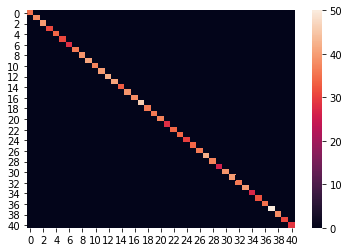

In [61]:
#conf_mat = confusion_matrix(y_test, preds2)
df_cm = pd.DataFrame(conf_mat, index=df['label'].unique(), columns=df['label'].unique())
print('F1-score% =', f1_score(y_test, preds2, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds2)*100)
sns.heatmap(df_cm)

#### 